In [1]:
from __future__ import print_function

from PIL import Image, ImageFilter
import PIL
from IPython import display
from IPython.display import clear_output

from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
import squeezedet as nn
net = nn.init()

INFO:tensorflow:Summary name mean iou is illegal; using mean_iou instead.


In [3]:
data_path = "./data/"
ext = ".png"
num_pics = 10

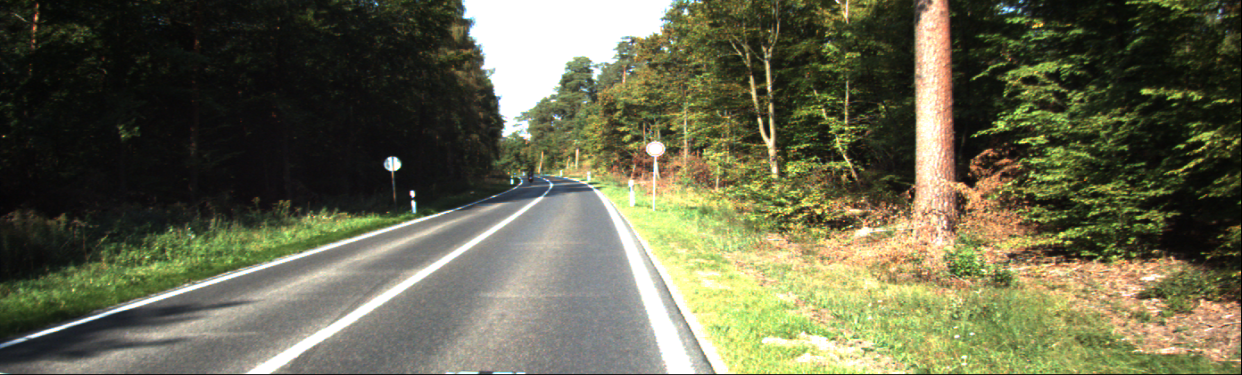

([], [], [])


In [7]:
display.set_matplotlib_close(True)
pics = []
for i in range(0,400):
    clear_output(wait=True)
    #raw_input()
    
    pred = nn.classify(data_path + str(i).zfill(10) + ext,net) 
    display.display(Image.open("tmp.png"))
    
    print(pred)